In [23]:
import numpy as np
import plotly.graph_objects as go
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [24]:
cnts = np.genfromtxt("opencl/randoms.dat")
cnts.shape

(10240,)

In [25]:
freqs = np.unique(cnts, return_counts=True)[1]

freqs = freqs/freqs.sum()
freqs = np.sort(freqs)[::-1]

cnts = np.abs(cnts)
#cnts = cnts[cnts<1e15]
#cnts = cnts[cnts>0]
cnts = cnts/cnts.sum()
cnts = np.sort(cnts)[::-1]

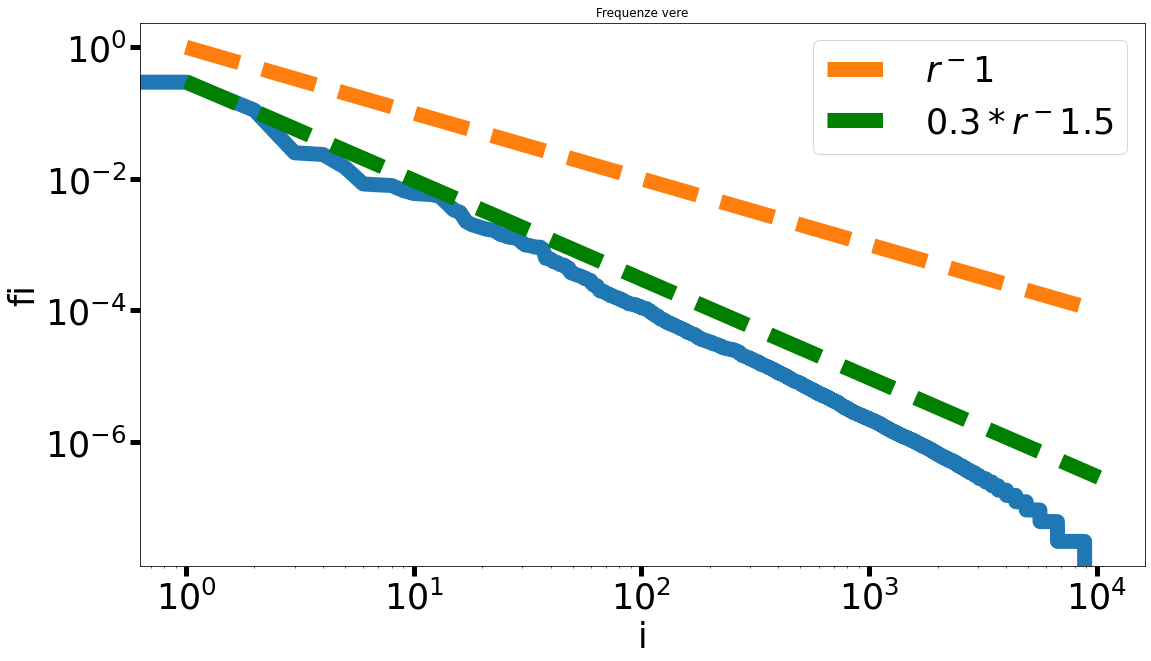

In [26]:
fig = plt.figure(figsize=(18,10))

y=cnts

x = np.linspace(1, len(y), 100)
plt.plot(y, lw=15)
plt.plot(x,1/x, lw=15, ls="--", label="$r^-1$")
plt.plot(x,0.3*x**(-1.5), lw=15, ls="--", c="green", label="$0.3*r^-1.5$")

plt.tick_params(labelsize=35, size=10, width=5)

plt.title("Frequenze vere")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("i", fontsize=35)
plt.ylabel("fi", fontsize=35)
plt.legend(fontsize=35)
plt.show()

In [27]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=y, marker=dict(symbol="0", size=20, color="blue"), line_width=10, name="", showlegend=False))
fig.add_trace(go.Scatter(x=x, y=1/x, line_width=10, line_dash="dash",name="x^-1"))

fit_func = lambda x, C, gamma: C * np.power(x, - gamma)

x = np.linspace(1, len(y), len(y))

popt, pcov = curve_fit(fit_func, x[:10000], y[:10000])
fig.add_trace(go.Scatter(x=x, y=fit_func(x, *popt), line_width=10, line_dash="longdash", name=f"C*x^-{round(popt[1],3)}"))

#dd = np.diff(np.diff(cnts))
#mask = np.argwhere((dd[1:]*dd[:-1]<0)).ravel()
#fig.add_trace(go.Scatter(x=x[mask],y=cnts[mask],  name=f"flexes", mode="markers"))

fig.update_xaxes(type="log", title="rank")
fig.update_yaxes(type="log", exponentformat="e", title="f")

fig.show()

In [28]:
istats = 1024
sim = 1000

In [35]:
cnts = np.genfromtxt("opencl/randoms.dat")
cnts.reshape((istats,sim))

array([[0.932804  , 0.00533816, 0.164079  , ..., 0.527707  , 0.94924   ,
        0.642005  ],
       [0.521879  , 0.990045  , 0.129054  , ..., 0.435783  , 0.538544  ,
        0.184617  ],
       [0.385872  , 0.884139  , 0.120469  , ..., 0.925266  , 0.573076  ,
        0.300474  ],
       ...,
       [0.255284  , 0.551943  , 0.694499  , ..., 0.0188473 , 0.164609  ,
        0.93678   ],
       [0.485365  , 0.905492  , 0.325547  , ..., 0.949219  , 0.626953  ,
        0.61135   ],
       [0.00460458, 0.939118  , 0.598048  , ..., 0.13939   , 0.325092  ,
        0.994829  ]])

In [36]:
cnts.reshape((istats,sim))[1][:5],cnts.reshape((istats,sim))[3][:5],cnts.reshape((istats,sim))[-1][:5]

(array([0.521879 , 0.990045 , 0.129054 , 0.0849532, 0.910682 ]),
 array([0.415877 , 0.529994 , 0.0736063, 0.339958 , 0.377078 ]),
 array([0.00460458, 0.939118  , 0.598048  , 0.521686  , 0.728772  ]))

In [37]:
import plotly.express as px

In [38]:
px.histogram(cnts.reshape((istats,sim))[1])

In [39]:
px.scatter(cnts.reshape((istats,sim))[2],cnts.reshape((istats,sim))[4])